# Análise da Evolução do Modo Pedestre nas Pesquisas Origem-Destino (OD)

## Overview
Este notebook analisa a evolução do modo pedestre ao longo das diferentes edições da pesquisa OD, identificando tendências e variações na proporção de viagens realizadas a pé entre os anos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
od_23_path = "../data/OD/ODS/od23_all.csv"
od_17_path = "../data/OD/ODS/od_2017.csv"
od_07_path = "../data/OD/ODS/OD_2007.csv"
od_97_path = "../data/OD/ODS/OD_1997.csv"
od_87_path = "../data/OD/ODS/OD_1987.csv"
od_77_path = "../data/OD/ODS/OD_1977.csv"

Leitura dos datasets da pesquisa OD

In [3]:
df_23 = pd.read_csv(od_23_path)
df_17 = pd.read_csv(od_17_path)
df_07 = pd.read_csv(od_07_path)
df_97 = pd.read_csv(od_97_path)
df_87 = pd.read_csv(od_87_path)
df_77 = pd.read_csv(od_77_path)

Função que retorna a representatividade do pedestres da pesquisa OD passada como referência

In [4]:
def pedestrian_rep(od_df, col_transp_means, col_exp_fact, pedestrian_value):
    """
    Calcula a representatividade percentual de viagens realizadas a pé em uma pesquisa OD.

    Parâmetros:
        od_df (pd.DataFrame): DataFrame da pesquisa OD.
        col_transp_means (str): Nome da coluna que indica o modo de transporte principal.
        col_exp_fact (str): Nome da coluna do fator de expansão.
        pedestrian_value (int/str): Valor na coluna de modo de transporte que representa pedestres.

    Retorna:
        float: Percentual de viagens realizadas a pé, arredondado para duas casas decimais.
    """
    df = od_df.groupby(col_transp_means)[col_exp_fact].sum()
    df_normalizado = (df / df.sum()) * 100

    return df_normalizado[pedestrian_value].round(2)

### Buscando a representatividade dos pedestres nas diferentes ODs

In [5]:
reps = []

In [6]:
rep_od_23 = pedestrian_rep(df_23, 'MODOPRIN', 'FE_VIA', 17) # valor a pé = 17
reps.append(rep_od_23)
rep_od_23

np.float64(28.2)

In [7]:
rep_od_17 = pedestrian_rep(df_17, 'MODOPRIN', 'FE_VIA', 16) # valor a pé = 16
reps.append(rep_od_17)
rep_od_17

np.float64(31.78)

In [8]:
rep_od_07 = pedestrian_rep(df_07, 'modoprin', 'fe_via', 16) # valor a pé = 16
reps.append(rep_od_07)
rep_od_07

np.float64(33.14)

In [9]:
rep_od_97 = pedestrian_rep(df_97, 'modoprin', 'fe_via', 12) # valor a pé = 12
reps.append(rep_od_97)
rep_od_97

np.float64(34.4)

In [10]:
rep_od_87 = pedestrian_rep(df_87, 'modoprin', 'fe_via', 13) # valor a pé = 13
reps.append(rep_od_87)
rep_od_87

np.float64(36.23)

In [11]:
rep_od_77 = pedestrian_rep(df_77, 'modoprin', 'fe_via', 11) # valor a pé = 11
reps.append(rep_od_77)
rep_od_77

np.float64(28.03)

### Gráfico de linha de representatividade de pedestres ao longo das pesquisas OD

In [12]:
reps

[np.float64(28.2),
 np.float64(31.78),
 np.float64(33.14),
 np.float64(34.4),
 np.float64(36.23),
 np.float64(28.03)]

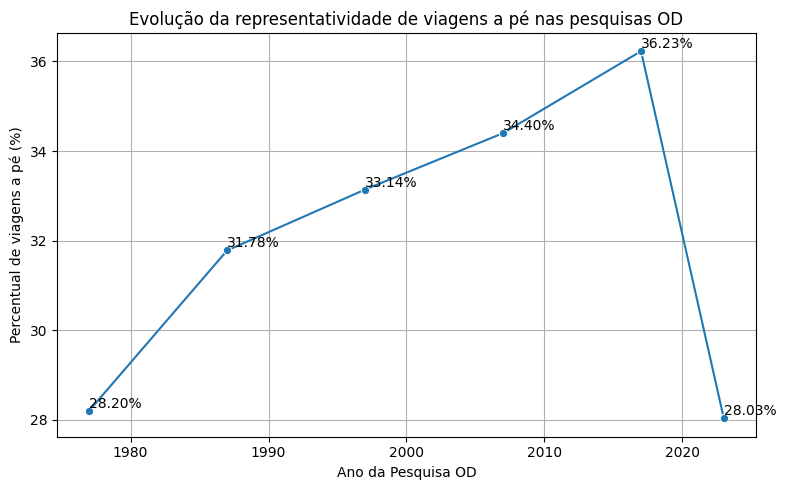

In [13]:
years = [1977, 1987, 1997, 2007, 2017, 2023]
plt.figure(figsize=(8, 5))
sns.lineplot(x=years, y=reps, marker='o')
for x, y in zip(years, reps):
    plt.text(x, y, f'{y:.2f}%', va='bottom', ha='left', fontsize=10)
plt.title('Evolução da representatividade de viagens a pé nas pesquisas OD')
plt.xlabel('Ano da Pesquisa OD')
plt.ylabel('Percentual de viagens a pé (%)')
plt.grid(True)
plt.tight_layout()
plt.show()